In [1]:
%load_ext autoreload
%autoreload 2
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path

from standes.analysis.recorders import get_recorders, get_recorder 

In [22]:
# load the data
results_folder = Path("E:/01_model_verification_analyses/acceleration_recorder/nltha_120621_sf2000_refined_step")
scale_factor = 2.0

with open(results_folder / "ground_acc.pickle", "rb") as file:
    ground_acc = np.array(pickle.load(file))

with open(results_folder / "first_floor_relative_acc.pickle", "rb") as file:
    first_floor_relative_acc = np.array(pickle.load(file))

with open(results_folder / "timearray.pickle", "rb") as file:
    time = np.array(pickle.load(file))

with open(results_folder / "recorders.pickle", "rb") as file:
    recorders = np.array(pickle.load(file))

ground_motion = np.loadtxt(results_folder / "ground_motion.csv", delimiter=",")
ground_motion_scaled = ground_motion.copy()
ground_motion_scaled[:,1] *= (scale_factor * 9810)

first_floor_acc_recorder = get_recorder(recorders, "node_acceleration", "101010200_[1]")

In [30]:
# resample the ground input ground motion so that it can be added to the relative motion
ground_motion_resampled = np.interp(time, ground_motion_scaled[:,0], ground_motion_scaled[:,1])
first_floor_abs_acc = first_floor_relative_acc + ground_motion_resampled

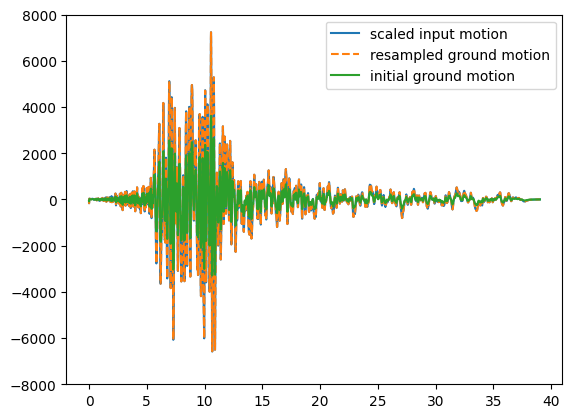

In [36]:
# plot some comparisons
plt.plot(ground_motion_scaled[:,0], ground_motion_scaled[:,1], label="scaled input motion")
plt.plot(time, ground_motion_resampled, ls="--", label="resampled ground motion")
plt.plot(ground_motion[:,0], ground_motion[:,1] * 9810, label="initial ground motion")

plt.ylim(-8000, 8000)
plt.legend()

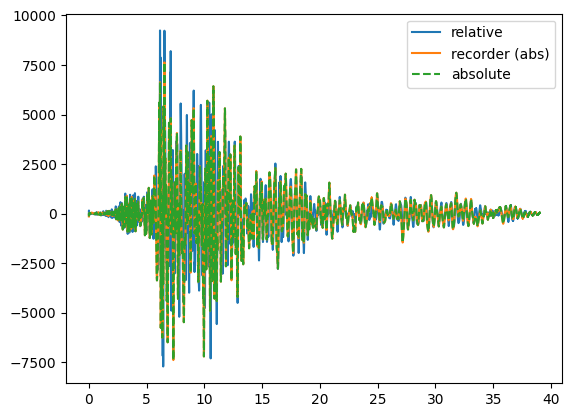

In [39]:
plt.plot(time, first_floor_relative_acc, label = "relative")
plt.plot(time, first_floor_acc_recorder.record[1], label = "recorder (abs)")
plt.plot(time, first_floor_abs_acc, ls="--", label = "absolute")
plt.legend()

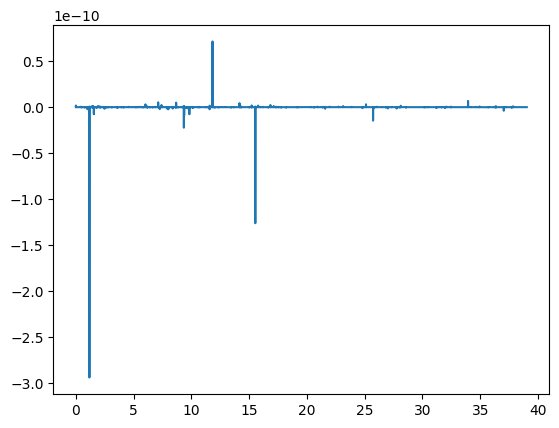

In [43]:
# difference between recorder and relative + ground
plt.plot(time[:-1], (first_floor_acc_recorder.record[1][:-1] - first_floor_abs_acc[:-1])/first_floor_acc_recorder.record[1][:-1] * 100)

conclusion: The absolute acceleration recorder that I have implemented records the acceleration correctly